#문제1

1번 

→ 3번 : 엔트로피 불순도가 낮을 수록 분류하기 좋은 상태 

→ 5번 : 중요도가 낮다하여 그 특성이 유용하지 않은 것이 아니라 

트리가 그 특성을 선택하지 않거나, 다른 특성이 동일한 정보를 지니고 있는 경우일 수 있다.

#문제2

2번 

→ 3번 : 계산 속도가 느려지지 않는다

→ 4번  : 연관성이 낮을 수록 오버피팅이 일어나지 않기 때문에 연관성이 높을 수록 성능이 낮다

#문제3

In [18]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

#data split
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

#preprocessing
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#LR
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print("전 train_score = %f"%(lr.score(train_scaled, train_target)))
print("전 test_score = %f"%(lr.score(test_scaled, test_target)))
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
param_grid = {"C": [0.0001,0.001,0.01,0.1,1,10,100,1000], "gamma" : [0.0001,0.001,0.01,0.1,1,10,100,1000]}
kfold = KFold(n_splits=5, shuffle = True, random_state = 1)

grid_search = GridSearchCV(SVC(), param_grid = param_grid, cv = kfold, return_train_score = True, n_jobs = -1).fit(train_scaled, train_target)
print("후 train_score = %f"%(lr.score(train_scaled, train_target)))
print("후 test_score  = %f"%(lr.score(test_scaled, test_target)))
print(format(grid_search.best_params_))

전 train_score = 0.932773
전 test_score = 0.925000
후 train_score = 0.932773
후 test_score  = 0.925000
{'C': 1000, 'gamma': 0.1}


c값에 변화가 있다.

#문제4

→ 2번 : 종속적으로 성능에 영향을 준다.

→ 3번 : leave-one-out cross validation은 n개의 데이터 샘플을 활용해서 모델을 검증하는 방식, 선형 회귀, 다항식 회귀에서 더 느린 연산 속도를 가질 이유가 없다. 모델의 성능을 검사하는 것으로 n의 값이 클 수록 연산 속도가 느려질 수 있다.

#문제5

0.9974226804123711
0.9305019305019305


<function matplotlib.pyplot.show>

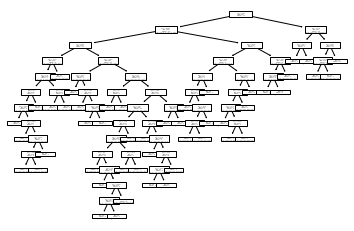

In [21]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
planets=sns.load_dataset('planets')
planets = planets.fillna(0)
planets_input = planets[['number','orbital_period','mass','distance','year']].to_numpy()
planets_target = planets['method'].to_numpy()

#data split
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    planets_input, planets_target, random_state=42)

tree=DecisionTreeClassifier(random_state=0)
tree.fit(train_input, train_target)
print(format(tree.score(train_input,train_target)))
print(format(tree.score(test_input, test_target)))

plot_tree(tree)
plt.show